In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv"

titanic_df = pd.read_csv(url)

titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
null_columns = titanic_df.columns[titanic_df.isnull().any()]

print(null_columns)

Index(['Age', 'Cabin', 'Embarked'], dtype='object')


In [ ]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

titanic_df['Cabin'].fillna('Unknown', inplace=True)

print(titanic_df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886 

<ipython-input-3-bd357d6ca268>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
<ipython-input-3-bd357d6ca268>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
def age_class(age):
    if age <= 16:
        return 0
    elif age <= 26:
        return 1
    elif age <= 36:
        return 2
    elif age <= 62:
        return 3
    else:
        return 4

titanic_df['AgeClass'] = titanic_df['Age'].apply(age_class)


print(titanic_df[['Age', 'AgeClass']].head())

    Age  AgeClass
0  22.0         1
1  38.0         3
2  26.0         1
3  35.0         2
4  35.0         2


In [ ]:
titanic_df.drop(columns=['Age'], inplace=True)


print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    male      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1      0   
2                             Heikkinen, Miss. Laina  female      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1      0   
4                           Allen, Mr. William Henry    male      0      0   

             Ticket     Fare    Cabin Embarked  AgeClass  
0         A/5 21171   7.2500  Unknown        S         1  
1          PC 17599  71.2833      C85        C         3  
2  STON/O2. 3101282   7.9250  Unknown        S         1  
3            113803  53.1000     C123        S         2  
4            373450

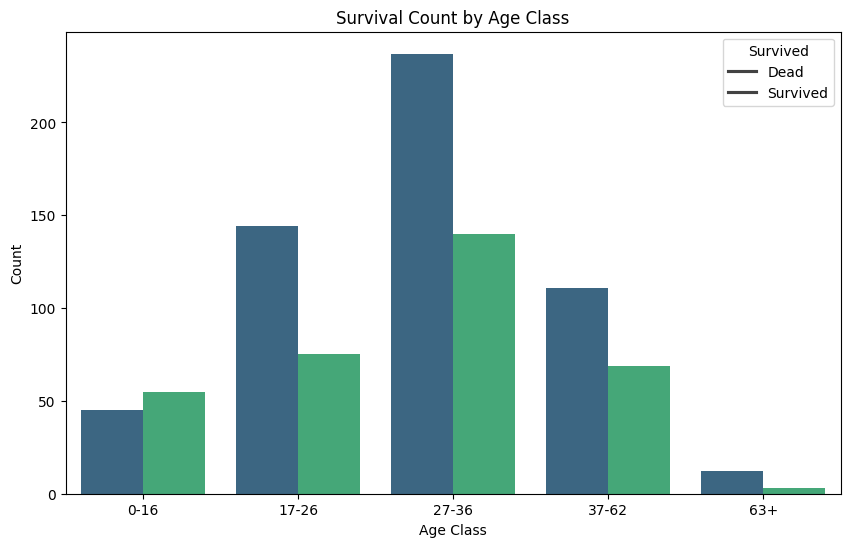

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


ageclass_counts = titanic_df.groupby(['AgeClass', 'Survived']).size().reset_index(name='Count')


plt.figure(figsize=(10, 6))
sns.barplot(data=ageclass_counts, x='AgeClass', y='Count', hue='Survived', palette='viridis')


plt.xlabel('Age Class')
plt.ylabel('Count')
plt.title('Survival Count by Age Class')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['0-16', '17-26', '27-36', '37-62', '63+'])
plt.legend(title='Survived', labels=['Dead', 'Survived'])


plt.show()

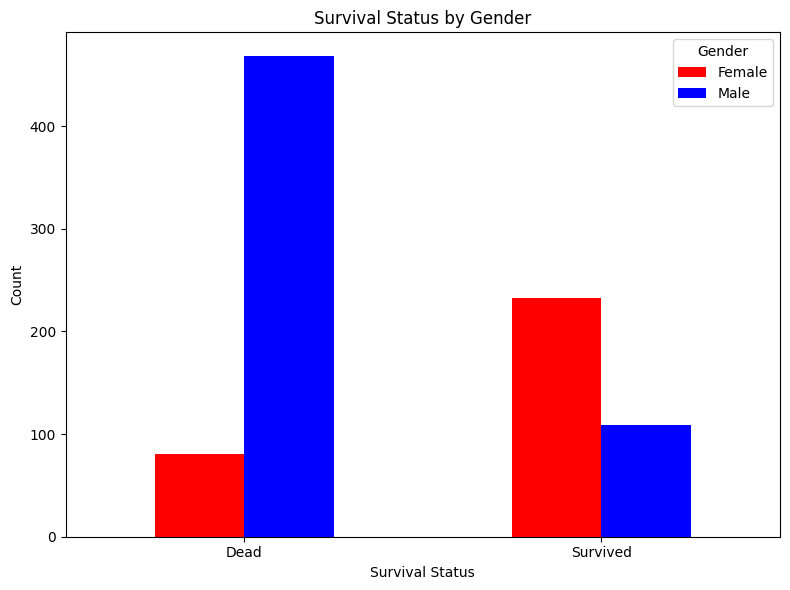

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic_df['Survival_Status'] = titanic_df['Survived'].map({0: 'Dead', 1: 'Survived'})

survival_sex_counts = titanic_df.groupby(['Survival_Status', 'Sex']).size().unstack().fillna(0)

survival_sex_counts.plot(kind='bar', stacked=False, figsize=(8, 6), color=['red', 'blue'])
plt.title('Survival Status by Gender')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.tight_layout()
plt.show()

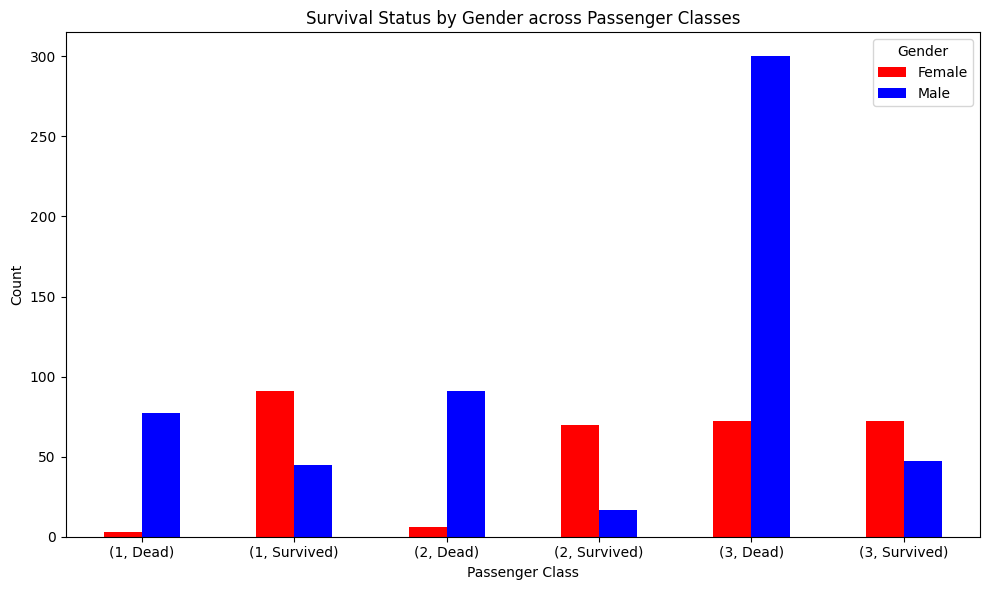

In [ ]:

pclass_survival_sex_counts = titanic_df.groupby(['Pclass', 'Survival_Status', 'Sex']).size().unstack(fill_value=0)

pclass_survival_sex_counts.plot(kind='bar', stacked=False, figsize=(10, 6), color=['red', 'blue'])
plt.title('Survival Status by Gender across Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.tight_layout()
plt.show()

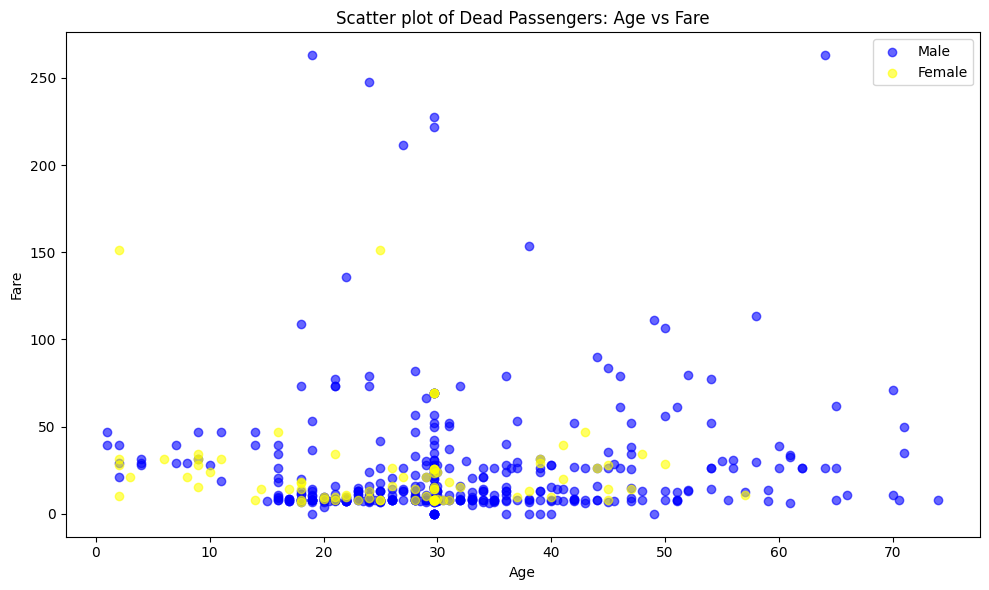

In [ ]:
import matplotlib.pyplot as plt


dead_passengers = titanic_df[titanic_df['Survived'] == 0]

male_passengers = dead_passengers[dead_passengers['Sex'] == 'male']
female_passengers = dead_passengers[dead_passengers['Sex'] == 'female']

plt.figure(figsize=(10, 6))

plt.scatter(male_passengers['Age'], male_passengers['Fare'], color='blue', label='Male', alpha=0.6)

plt.scatter(female_passengers['Age'], female_passengers['Fare'], color='yellow', label='Female', alpha=0.6)

plt.title('Scatter plot of Dead Passengers: Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')


plt.legend()


plt.tight_layout()
plt.show()